#### Lab 4 Coursework Applied Statistics

In [ ]:
pip install pandas_datareader

In [5]:
from pandas_datareader import wb
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
# Importing distributions
from scipy.stats import norm, laplace, t, kstest, rv_histogram, cauchy

#### Question 1) 

/opt/conda/lib/python3.10/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: WLD
  warnings.warn(


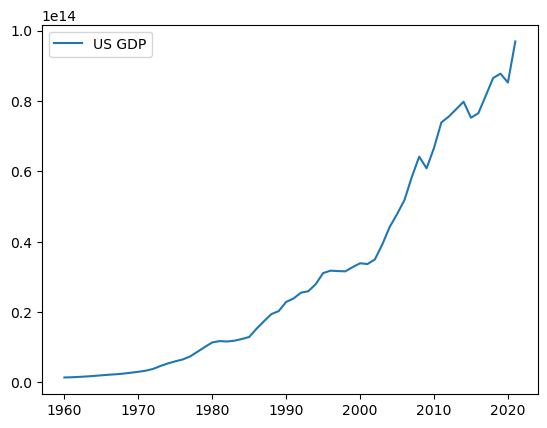

In [6]:
gdp_data = wb.download(indicator= 'NY.GDP.MKTP.CD', country= 'WLD', start='1960', end='2021')
time = np.arange(1960, 2022)
gdp = gdp_data.iloc[:, 0].astype(float).to_numpy()
# Data is returned in inverse chronological order, so reverse order.
gdp = np.flip(gdp)
# Plot world GDP data against time.
plt.plot(time, gdp, label="US GDP")
plt.legend()
plt.show()

#### **1a)** If the growth rate was a constant r, then the world’s GDP would grow as  $$ GDP_k = GDP_0(1+r)^k $$ where k is the number of years since 1960 and GDP0 is the world’s GDP in 1960. This is clearly not a linear relationship between time (k, in years) and GDP . However, we can get a linear relationship by applying a simple transformation f (−) on both side of the equation. What is this transformation? (Hint: we used this transformation in the context of MLE, it turns products into sums.)

 Code for Question 1a)

 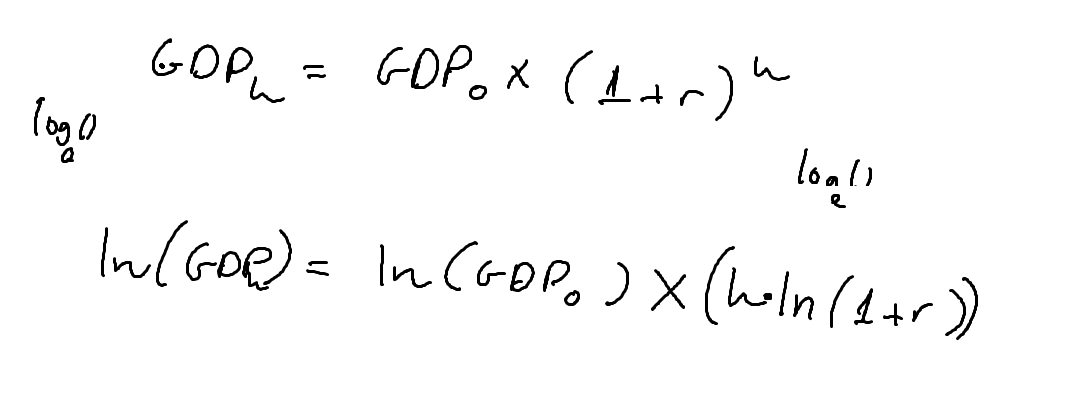


In [7]:
def gdp_linear_transform(gdp):
	return np.log(gdp)

#### **1b)**  Apply this transformation f (−) to the GDP data, and perform a regression against the time variable. On the same plot, display your regression line, a scatter-plot of the (transformed) data points, and your R^2 value.

Slope Parameter:  0.07156635288409492
Y-Intercept Parameter:  -112.01450478870926
Pearson Correlation Coefficient 0.9826894064474254
Coefficient of Determination (R2) 0.9656784695439933
P value, Row Coeffiecent 1.2172770550360432e-45
R2 = 1, means perfect linear dependency, R2 = 0, means no linear dependency (slope=0).


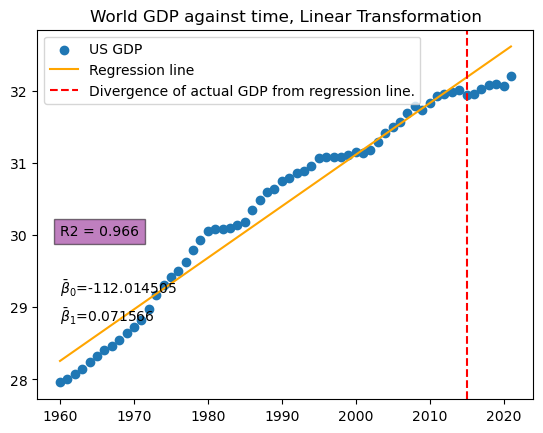

In [8]:
# Code for Question 1b)

# Apply the transformation, then perform something called regression, so not sure, display this regression line, scatter of transformed data.
# Looks like we need to go over a lecture that talks about transformation of a dataset.

# # Performing regression using linregress from scipy.stats, as he said it's fine to use in lecture.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
true_slope, true_intercept, rvalue, pvalue, _ = linregress(time, gdp_linear_transform(gdp))  # take time and gdp_log
print("Slope Parameter: ", true_slope)
print("Y-Intercept Parameter: ", true_intercept)
print("Pearson Correlation Coefficient", rvalue)
print("Coefficient of Determination (R2)", rvalue ** 2)
print("P value, Row Coeffiecent", pvalue)
print("R2 = 1, means perfect linear dependency, R2 = 0, means no linear dependency (slope=0).")
# print("p-value: Hypothesis test where null test is slope is zero, using t-distribution.", pvalue)

# Obtaining the R2 value.
# r2 = reg.score(time, gdp_log)
r2 = rvalue ** 2

# # Plotting
# Add box around R2 value.
plt.text(1960, 30, "R2 = " + f"{r2:.3f}", bbox=dict(facecolor='purple', alpha=0.5))
plt.title("World GDP against time, Linear Transformation")
plt.scatter(time, gdp_linear_transform(gdp), label="US GDP")
predicted_regression_values = true_intercept + (true_slope * time)  # y = mx + b, where time is the x variable.
plt.plot(time, predicted_regression_values, label="Regression line", color="orange")
# plt.xticks(np.arange(1960, 2022, 5))
# Put red line at x axis 2015, to highlight the divergence of the actual GDP from the regression line.
plt.axvline(x=2015, color='red', linestyle='--', label="Divergence of actual GDP from regression line.")

plt.text(1960, 29.2,r'$\bar{\beta}_0$'+'={:2f}'.format(true_intercept))
plt.text(1960, 28.8,r'$\bar{\beta}_1$'+'={:2f}'.format(true_slope))

plt.legend()
plt.show()

#### **1c)** Compute the residuals of your regression (i.e. the difference between the model and the observations), and print their mean and their standard deviation ˆσ. Perform a KS-test to determine whether we can reject the null hypothesis that the residuals are sampled from a normal distribution with mean 0 and standard deviation ˆσ. Take α = 99%.

In [9]:
np.arange(1, 10 + 1)
# np.array(list(range(1,10+1)))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Values:  (62,) (62,)
Residuals:  (62,)
Mean of residuals:  -7.449238358775244e-15
Standard Deviation of residuals:  0.24144627148321077


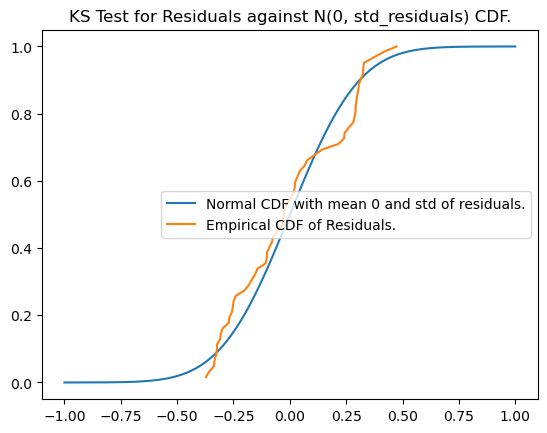

KS Test Statistic: 0.13053964663293083, p-value: 0.2211569155807408
Cannot reject null hypothesis, residuals are sampled from a normal distribution.


In [10]:
# Code for Question 1c)

# Now they want us to perform a KS-test in order to reject the null hypothesis, H0 being, data points are samples from normal distribution, with mean 0 and standard deviation,
# with an alpha of 99 %. (Not sure what is the KS-test hypothesis as of currently.)

# Residuals are the difference between the model and the observations.
# Obtain:
# Compute residuals of regression.
# 1. Mean of residuals
# 2. Standard deviation of residuals
# 3. Perform KS-test to determine whether we can reject the null hypothesis that the residuals are sampled from a normal
# distribution with mean 0 and standard deviation ˆσ.
# Take α = 99%

# Residuals are the difference between the model and the observations.
print("Values: ", predicted_regression_values.shape, gdp_linear_transform(gdp).shape)  # same shape, (62,) (62,)
# print("Some values: ", predicted_regression_values[:10], gdp_linear_transform(gdp)[:10])

# subtract with abs value, as we want the difference.
residuals = (predicted_regression_values - gdp_linear_transform(gdp))
print("Residuals: ", residuals.shape)  # , residuals[:10])

# 1. Mean of residuals
mean_residuals = np.mean(residuals)
print("Mean of residuals: ", mean_residuals)

# 2. Standard deviation of residuals
std_residuals = residuals.std()
print("Standard Deviation of residuals: ", std_residuals)


# 3. Perform KS-test (Kolmogorov–Smirnov tests) to determine whether we can reject the null hypothesis.
# H0 = residuals are sampled from a normal distribution with mean 0 and standard deviation ˆσ of residuals.
# We do not know the standard deviation.
# Take α = 99%

# Will do this question after going over KS-test in lecture. Recording 9, Week 8
# KS test is a hypothesis test for goodness of fit of a distribution, specifically in the continuous case.

def ecdf(x):
	"""Calculating Emperical Cumulative Distribution Function, obtained from lecture 8 jupyter notebook."""
	xs = np.sort(x)
	ys = np.arange(1, len(xs) + 1) / float(len(xs))
	return xs, ys


plt.title("KS Test for Residuals against N(0, std_residuals) CDF.")
alpha = 0.99
x = np.linspace(-1, 1, 200)
norm_cdf = norm.cdf(x, loc=0, scale=std_residuals) # norm.cdf(x, loc=0, scale=std_residuals)
plt.plot(x, norm_cdf, label='Normal CDF with mean 0 and std of residuals.')

# We have the samples which are the residuals.
samples = residuals

xs, emp_cdf = ecdf(samples)
plt.plot(xs, emp_cdf, label='Empirical CDF of Residuals.')



test_stat, pval = kstest(samples, norm(loc=0, scale=std_residuals).cdf)

plt.legend()
plt.show()

# K Test

print(f"KS Test Statistic: {test_stat}, p-value: {pval}")
if pval < (1 - alpha)/2:
	print("Reject null hypothesis, residuals are not sampled from a normal distribution.")
else:
	print("Cannot reject null hypothesis, residuals are sampled from a normal distribution.")

#### **1d)** You will now apply the inverse of the transformation f(-) to your linear model, in order to get a non-linear model for the GDP. On the sample plot, display your (non-linear) model and a scatter plot of the (original) data points.

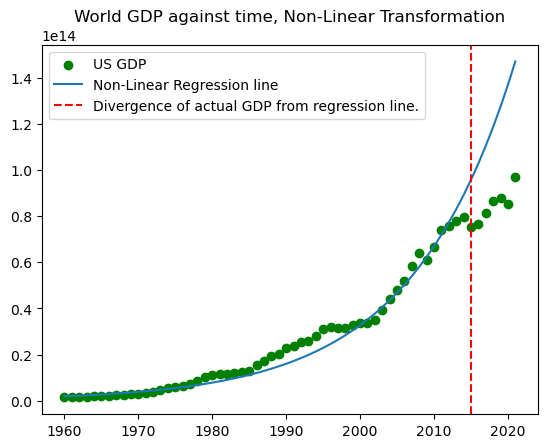

In [11]:
# Code for Question 1d)
# Now we apply the inverse transformation to the linear model we have opened and simply plot the data points of them.

# Inverse of the transformation f (−) is:
# We took the natural log, so now we take the natural exponent (e^x).


# Plotting
plt.title("World GDP against time, Non-Linear Transformation")
plt.scatter(time, gdp, label="US GDP", color="green")
predicted_regression_values = np.exp(true_intercept + (true_slope * time))  # y = mx + b, where time is the x variable.
plt.plot(time, predicted_regression_values, label="Non-Linear Regression line")
plt.axvline(x=2015, color='red', linestyle='--', label="Divergence of actual GDP from regression line.")
# plt.xticks(np.arange(1960, 2022, 5))
plt.legend()
plt.show()

#### **1e)** What is the relationship between the slope of the regression and the long-term growth rate of the world GDP? Compute the long-term growth rate of the world GDP.

In [12]:
# Code for Question 1e)
# The slope of regression and the long term rate is related by the equation
# in the first part in principle. But in reality the 

# What is meant by the long-term growth rate of the world GDP and how does that relate to the slope parameter?
growth_rate = (np.exp(true_slope) - 1) * 100
print(f"Growth rate: {growth_rate:.2f} %")

Growth rate: 7.42 %


#### **1f)** What do you observe since approximately 2015?

At around 2015, actual GDP is lower than the predicted GDP from the regression line, where GDP data is diverging away, from the regression line.

This is shown in both images below and in the respective plots. No longer following the linear trend and becoming less of a linear relationship.

-------------------

#### Question 2)

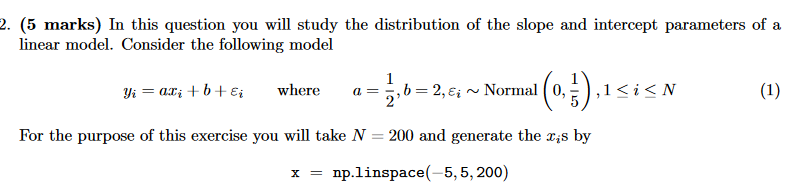

In [13]:
# size of the data
n = 200
# number of experiments
N = 10000
# parameters of the model
beta0 = 2
beta1 = 1/2
sigma = 1/5
x = np.linspace(-5, 5, n)  # x samples are fixed.


def q2_linear_formula(x, error, beta0=2, beta1=1/2):
	"""Linear Regression formula for Question 2. 200 samples with X."""
	return (beta1 * x) + beta0 + error


def generate_error_vector():
	"""Generate error vector of size 200, with mean 0, and std of 1/5, quite simple."""
	# Get normal distribution with mean 0 and std of 1/5.
	return norm.rvs(loc=0, scale=sigma, size=n)  # random sample of 200 values.

#### **2a)** Generate 10000 sets of error vectors εi and use them to perform 10000 linear regression of the N - dimensional vectors (yi) against (xi), where yi is given by (1).

In [14]:
# Code for Question 2a)

error_sets = [generate_error_vector() for _ in range(N)]  # 10000 sets of error vectors. 10000 x 200

# Perform 10000 linear regressions.
slopes = []
intercepts = []
ys = []

for i in range(N):
    e = error_sets[i]
    y_obs = q2_linear_formula(x, e)
    # perform regression
    slope, intercept, r, p, se = linregress(x, y_obs)
    ys.append(y_obs)
    slopes.append(slope)
    intercepts.append(intercept)

#### **2b)** Collect the slopes and the intercepts of these 10000 linear regressions and plot their histograms against their respective theoretical densities given in the lecture. What do you observe?

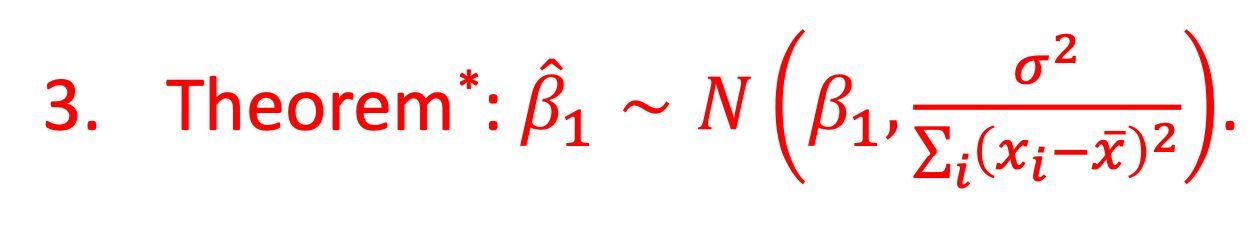


For Question 2b, the proof of normality of the samples slopes and intercepts, as we obtain a good match between the histogram and the curve, more specifically the curve and the histogram have good matches for both the derived slope and histogram samples respectively.

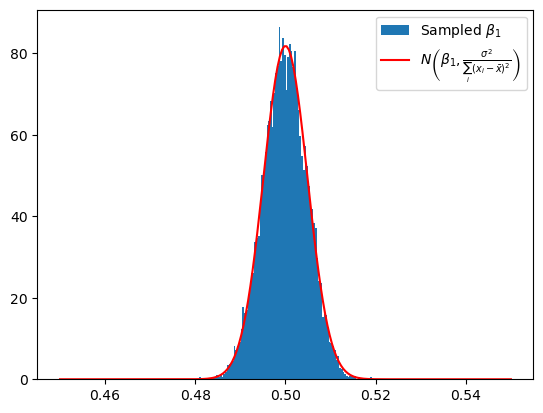

In [15]:
# Code for Question 2b)

# SLOPE PARAMETERS
# Histogram for slope parameters.
slope_x = np.linspace(0.45, 0.55, 200)
ssx = (x-np.mean(x)) ** 2
slope_pdf = norm.pdf(slope_x, loc=beta1, scale=(sigma/np.sqrt(ssx.sum())))

#plot
plt.hist(slopes, int(np.sqrt(N)), density=True, label=r'Sampled $\beta_1$')
plt.plot(slope_x, slope_pdf, color="red", label=r'$N\left(\beta_1,\frac{\sigma^2}{\sum_i(x_i-\bar{x})^2}\right)$')
plt.legend()
plt.show()


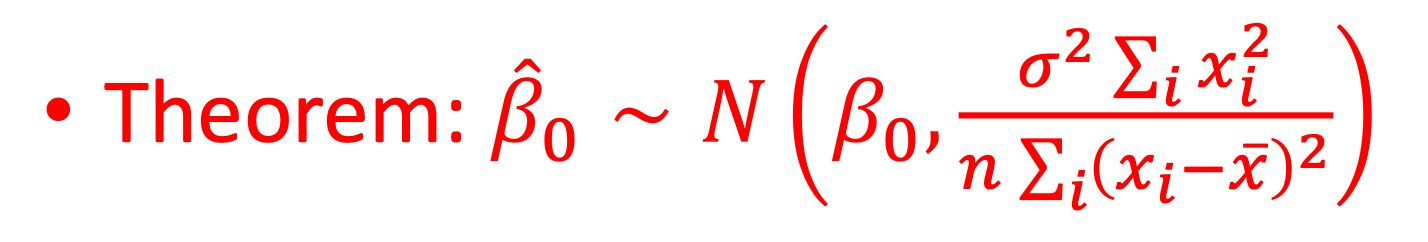

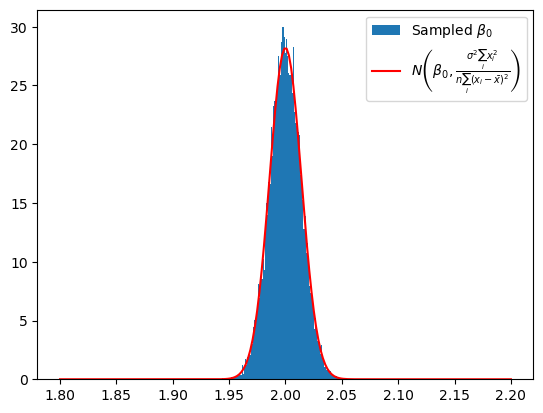

In [16]:
# Histogram for intercept parameters and respective theoretical histogram.
# Histogram for intercept parameters.
intercept_x = np.linspace(1.8, 2.2, 200)
ssx = (x-np.mean(x)) ** 2
denomator = np.sqrt(np.sum(ssx) * n)
nominator = sigma * np.sqrt(np.sum(x**2))

intercept_pdf = norm.pdf(intercept_x, loc=beta0, scale=nominator/denomator)

plt.hist(intercepts, int(np.sqrt(N)), density=True, label=r'Sampled $\beta_0 $')
plt.plot(intercept_x, intercept_pdf, color="red", label=r'$N\left(\beta_0,\frac{\sigma^2 \sum_i x_i^2 }{n\sum_i(x_i-\bar{x})^2}\right)$')
plt.legend()
plt.show()

#### **2c)** For each of the 10000 regression, compute the test statistic for the slope and for the intercept (given in the lecture) and plot their histograms against their theoretical density (also given in the lecture). What do you observe?

I observe that testing the specific parameters and observing thier samples obtained, they both follow the t distribution with parameter n-2 degrees of freedom, this is important as without it we will not be able to test whether a specific parameter is something we should generally accept or not.

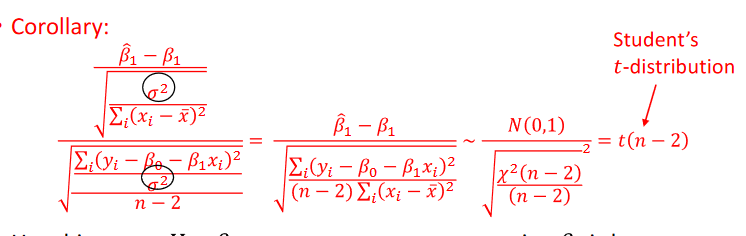

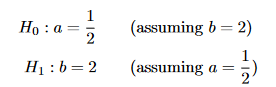

In [17]:
print(beta1)
h_beta1 = 1/2
a1 = np.array(slopes) - h_beta1

a2 = np.asarray(slopes) - np.full(N,beta1)


0.5


ppf:  2.345328348533689


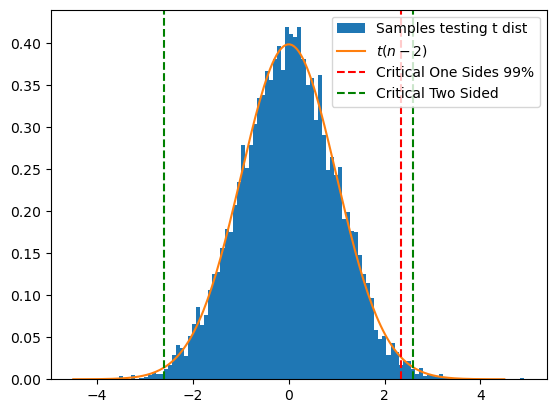

In [24]:
# Code for Question 2d) 
# We are testing parameters are valid and something we should expect.
# If not we will reject the hypothesis.
# We would like to do parametric testing.
# --------------------------------------


# H0 Slide 29
# b0 = c, b
# b1 = m, a

h_beta1 = 1/2
t_beta0 = 2



slopes = []
distances = []
for i in range(N):
    e = generate_error_vector()
    y_obs = q2_linear_formula(x, e, beta0=t_beta0, beta1=h_beta1)
    y = y_obs - e
    slope, intercept, r, p, se = linregress(x, y_obs)
    slopes.append(slope)  # sample b1.
    distances.append(((y_obs-y)**2).sum())
    

# Assuming b=2, assuming b0 is known.


numerator = (np.array(slopes) - h_beta1)
deno_den = np.sum(ssx) * (n-2)
denomator = np.sqrt(distances / deno_den)


plt.hist((numerator / denomator), int(np.sqrt(N)), density=True, label=r'Samples testing t dist')


print("ppf: ", t(n-2).ppf(0.99))

# plot the t distribution
t_x = np.linspace(-4.5,4.5, n)
plt.plot(t_x, t(n-2).pdf(t_x), label=r'$t(n-2)$')
plt.axvline(x=t(n-2).ppf(0.99), color='red', linestyle='--', label="Critical One Sides 99%")
plt.axvline(x=t(n-2).ppf(0.995), color='green', linestyle='--', label="Critical Two Sided")
plt.axvline(x=t(n-2).ppf(0.005), color='green', linestyle='--')
plt.legend()
plt.show()



#### H1 Testing the y-intercept

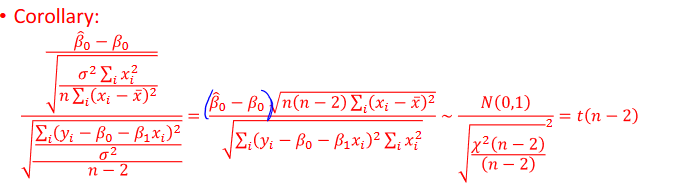

In [1]:
# H1 Slide 30.
# b0 = c, b, b0 = 2 hypothesis
# b1 = m, a, b1 = 1/2 assumed, known.

# Testing the y-intercept. 


t_beta1 = 1/2
h_beta0 = 2

slopes = []
intercepts = []
distances = []
for i in range(N):
    e = generate_error_vector()
    y_obs = q2_linear_formula(x, e, beta0=h_beta0, beta1=t_beta1)
    y = y_obs - e
    slope, intercept, r, p, se = linregress(x, y_obs)
    slopes.append(slope)  # sample b1.
    intercepts.append(intercept)
    distances.append(((y_obs-y)**2).sum())
    

nsq = n * (n-2)

numerator = (intercepts- np.full(N, h_beta0) ) * (np.sqrt(nsq*np.sum(ssx)))

denomator = np.sqrt(distances * np.full(N, np.sum(x**2)))

plt.title("Testing b1, y intercept is a good value")
plt.hist((numerator / denomator), int(np.sqrt(N)), density=True, label=r'Samples testing t dist')

# plot the t distribution
t_x = np.linspace(-4.5,4.5, n)
plt.plot(t_x, t(n-2).pdf(t_x), label=r'$t(n-2)$')
plt.axvline(x=t(n-2).ppf(0.99), color='red', linestyle='--', label="Critical One Sides 99%")
plt.axvline(x=t(n-2).ppf(0.995), color='green', linestyle='--', label="Critical Two Sided 0.5% & 99.5%")
plt.axvline(x=t(n-2).ppf(0.005), color='green', linestyle='--')
plt.legend()
plt.show()



NameError: name 'N' is not defined

#### **2d)** Take the last of your regressions and perform the following two tests with α = 99% (you may use either p-values or critical regions but make sure you think about whether this is a one-sided or two-sided test).

Must be 2 sided test, because test statistic can estimate value on both sides, which may be considered extreme.


--------

#### B1 Testing, First Test
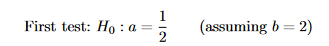

In [26]:
# Test function for b1 testing. (Test Statistic for one variable)
t_beta0 = 2
h_beta1 = 1/2


e = generate_error_vector()
y_obs = q2_linear_formula(x, e, beta0=t_beta0, beta1=h_beta1)
y = y_obs - e
slope, intercept, r, p, se = linregress(x, y_obs)
distance = ((y_obs-y)**2).sum()


numerator = (np.array(slope) - h_beta1)
deno_den = np.sum(ssx) * (n-2)
denomator = np.sqrt(distance / deno_den)

p_value = numerator / denomator


In [8]:
# Testing b0 hypothesis
from scipy import stats
def q2_linear_formula(x, error, beta0=2, beta1=1/2):
	"""Linear Regression formula for Question 2. 200 samples with X."""
	return (beta1 * x) + beta0 + error

def generate_error_vector():
	"""Generate error vector of size 200, with mean 0, and std of 1/5, quite simple."""
	# Get normal distribution with mean 0 and std of 1/5.
	return stats.norm.rvs(loc=0, scale=1, size=12)  # random sample of 200 values.

# Picked from last of array.
coordinates = [(1,17), (3,12), (3,8), (4,10), (7,-2), (7, -6), (9, -9), (9, -5), (10,-9), (12,-19), (15,-23), (16,-28)]
x = [x for x,y in coordinates]
y = [y for x,y in coordinates]
e = generate_error_vector()
y_obs = q2_linear_formula(x, e, beta0=20.0, beta1=h_beta1)
y = y_obs - e
slope, intercept, r, p, se = linregress(x, y_obs)
distance = ((e)**2).sum()
nsq = n * (n-2)


numerator = (np.array(slope) - h_beta1)
deno_den = np.sum(ssx) * (n-2)
denomator = np.sqrt(distance / deno_den)

p_value = numerator / denomator


critical_a, critical_b = t(n-2).ppf(0.005), t(n-2).ppf(0.995)


print(f"Observed Slope: {p_value}")
print(f"P Value: {t(n-2).cdf(p_value)}")

if p_value < critical_a or p_value > critical_b:
    print("Reject H0, beta1 is not a valid parameter to choose from.")
else:
    print("Dont reject H0, beta1 is a valid parameter, and can be exprected")


plt.title(r"First Test ~ (b1) a=1/2 with $\alpha=99\%$")

t_x = np.linspace(-4.5,4.5, n)
plt.plot(t_x, t(n-2).pdf(t_x), label=r'$t(n-2)$')
plt.axvline(p_value, color="red", label="P Val")
plt.axvline(x=t(n-2).ppf(0.995), color='green', linestyle='--', label="Critical Two Sided")
plt.axvline(x=t(n-2).ppf(0.005), color='green', linestyle='--')
plt.legend()
plt.show()



TypeError: can't multiply sequence by non-int of type 'float'

-----------------

#### B0 Testing, Second Test
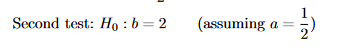

In [31]:
# Test function for b0 testing.
h_beta0 = 2
t_beta1 = 1/2

e = generate_error_vector()
y_obs = q2_linear_formula(x, e, beta0=h_beta0, beta1=t_beta1)
y = y_obs - e
slope, intercept, r, p, se = linregress(x, y_obs)
distance = ((y_obs-y)**2).sum()

nsq = n * (n-2)
numerator = (intercept-h_beta0)  * (np.sqrt(nsq*np.sum(ssx)))
denomator = np.sqrt(distance * np.sum(x**2))

p_value = numerator/denomator

Dont reject H0, beta is a valid parameter, and can be exprected


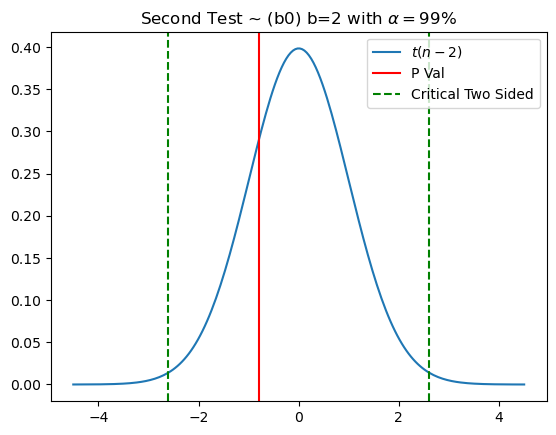

In [41]:
# Testing b0 hypothesis

e = generate_error_vector()
y_obs = q2_linear_formula(x, e, beta0=h_beta0, beta1=t_beta1)
y = y_obs - e
slope, intercept, r, p, se = linregress(x, y_obs)
distance = ((y_obs-y)**2).sum()

nsq = n * (n-2)
numerator = (intercept-h_beta0)  * (np.sqrt(nsq*np.sum(ssx)))
denomator = np.sqrt(distance * np.sum(x**2))
p_value = numerator/denomator


critical_a, critical_b = t(n-2).ppf(0.005), t(n-2).ppf(0.995)


if p_value < critical_a or p_value > critical_b:
    print("Reject H0, beta0 is not a valid parameter to choose from.")

else:
    print("Dont reject H0, beta is a valid parameter, and can be exprected")


plt.title(r"Second Test ~ (b0) b=2 with $\alpha=99\%$")

t_x = np.linspace(-4.5,4.5, n)
plt.plot(t_x, t(n-2).pdf(t_x), label=r'$t(n-2)$')
plt.axvline(p_value, color="red", label="P Val")
plt.axvline(x=t(n-2).ppf(0.995), color='green', linestyle='--', label="Critical Two Sided")
plt.axvline(x=t(n-2).ppf(0.005), color='green', linestyle='--')
plt.legend()
plt.show()



-------------

#### **2e)** Perform another 10000 regressions based on this model. Collect the slopes and intercepts of these regressions as well as the associated statistics. Plot their histograms. What do you observe? Change the model to 

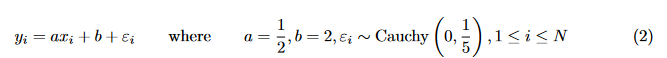

Cauchy allows really extreme values to be picked from the distribution as the error, making intercepts extremely large, and not conform the distribution of normal. As you can see by the histograms, the values range drastically, from -12000 to 2000, and doesn't seem to distribute around from center value. And this range changes drastically every run.

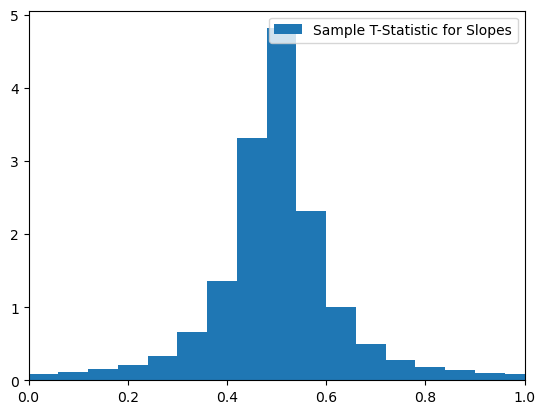

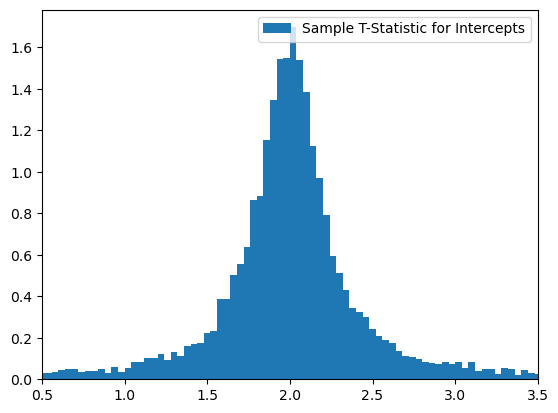

In [53]:
n = 200
# number of experiments
N = 10000
# parameters of the model
beta0 = 2
beta1 = 1/2
sigma = 1/5
x = np.linspace(-5, 5, n)  # x samples are fixed.


def linear_formula(x, error, beta0=beta0, beta1=beta1):
	"""Linear Regression formula for Question 2. 200 samples with X."""
	return (beta1 * x) + beta0 + error


def generate_error_cauchy_vector():
	"""Generate error vector of size 200, with mean 0, and std of 1/5, quite simple."""
	# Get normal distribution with mean 0 and std of 1/5.
	return cauchy.rvs(loc=0, scale=sigma, size=n)  # random sample of 200 values.


slopes = []
intercepts = []
for i in range(N):
    error = generate_error_cauchy_vector()
    y_obs = q2_linear_formula(x, error, beta0, beta1)
	# perform regression
    slope, intercept, r, p, se = linregress(x, y_obs)
    # r values, intercep, p values, standard error.s
    slopes.append(slope)
    intercepts.append(intercept)


# Plot slopes histogram
slope_x = np.linspace(-5, 10, n)
ssx = (x-np.mean(x)) ** 2
slope_pdf = cauchy.pdf(slope_x, loc=beta1, scale=(sigma/np.sqrt(ssx.sum())))
plt.hist(slopes, int(np.sqrt(N)), density=True, label=r'Sample T-Statistic for Slopes', range=(-3, 3))
#plt.plot(slope_x, slope_pdf, color="red", label=r'$Cauchy\left(\beta_1,\frac{\sigma^2}{\sum_i(x_i-\bar{x})^2}\right)$')
# plt.hist(slopes, int(np.sqrt(N)), density=True, label="Cauchy Slope Parameters")
plt.xlim(0,1)
plt.legend()
plt.show()



# Plot intercepts histogram

intercept_x = np.linspace(-5, 10, n)
ssx = (x-np.mean(x)) ** 2
denomator = np.sqrt(np.sum(ssx) * n)
nominator = sigma * np.sqrt(np.sum(x**2))
intercept_pdf = cauchy.pdf(intercept_x, loc=beta0, scale=nominator/denomator)
plt.hist(intercepts, int(np.sqrt(N)), density=True, label='Sample T-Statistic for Intercepts', range=(0, 4))
#plt.plot(intercept_x, intercept_pdf, color="red", label=r'$Cauchy\left(\beta_0,\frac{\sigma^2 \sum_i x_i^2 }{n\sum_i(x_i-\bar{x})^2}\right)$')
# plt.plot(intercept_x, t(n-2).pdf(intercept_x))
plt.xlim(0.5,3.5)
plt.legend()
plt.show()


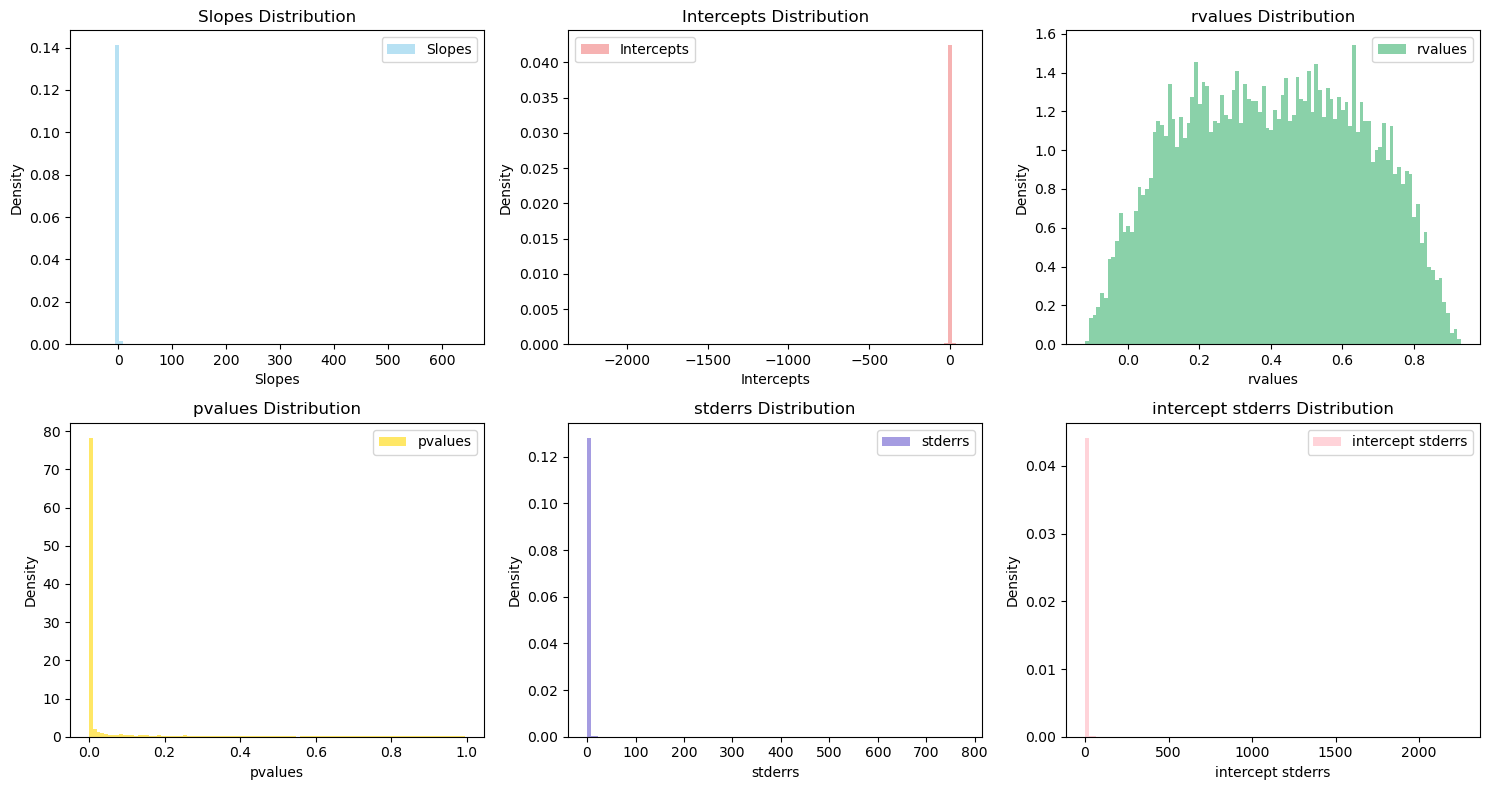

In [44]:
def generate_data(N, n, sigma, a, b):
    x = np.linspace(-5, 5, n)
    slope_list, intercept_list, rvalue_list = [], [], []
    pvalue_list, stderr_list, intercept_stderr_list = [], [], []

    for _ in range(N):
        err = cauchy.rvs(scale=sigma, size=n)
        y = b + a * x + err
        regression = linregress(x, y)
        slope_list.append(regression.slope)
        intercept_list.append(regression.intercept)
        rvalue_list.append(regression.rvalue)
        pvalue_list.append(regression.pvalue)
        stderr_list.append(regression.stderr)
        intercept_stderr_list.append(regression.intercept_stderr)

    return (
        slope_list, intercept_list, rvalue_list,
        pvalue_list, stderr_list, intercept_stderr_list
    )

def plot_histograms(data, titles, colors, layout):
    fig, axes = plt.subplots(nrows=layout[0], ncols=layout[1], figsize=(15, 8))

    for i, (values, title, color) in enumerate(zip(data, titles, colors), start=1):
        axes.flatten()[i-1].hist(values, bins=100, density=True, color=color, alpha=0.6, label=title)
        axes.flatten()[i-1].set_title(f'{title} Distribution')
        axes.flatten()[i-1].set_xlabel(title)
        axes.flatten()[i-1].set_ylabel('Density')
        axes.flatten()[i-1].legend()

    plt.tight_layout()
    plt.show()

# Define parameters
a=1/2
b=2
# Generate data
slope, intercept, rvalue, pvalue, stderr, intercept_stderr = generate_data(N, n, sigma, a, b)

# Plot histograms with different colors and layout (2 rows, 3 columns)
data = [slope, intercept, rvalue, pvalue, stderr, intercept_stderr]
titles = ['Slopes', 'Intercepts', 'rvalues', 'pvalues', 'stderrs', 'intercept stderrs']
colors = ['skyblue', 'lightcoral', 'mediumseagreen', 'gold', 'slateblue', 'lightpink']
layout = (2, 3)

plot_histograms(data, titles, colors, layout)


-----------------
#### End of Lab 4 Work